In [61]:
import matplotlib.pyplot as plt
from transformers import AutoModelForImageClassification
from datasets import load_from_disk
import torch
from torchvision.transforms import (
    Compose,
    Resize,
    ToTensor,
)

In [62]:
model = AutoModelForImageClassification.from_pretrained("outputs/resnet18")
dataset = load_from_disk("datasets/Galaxy10")

In [63]:
_val_transforms = Compose(
        [
            Resize((224, 224)),
            ToTensor(),
            # normalize,
        ]
    )

def val_transforms(example_batch):
    """Apply _val_transforms across a batch."""
    example_batch["pixel_values"] = [
        _val_transforms(pil_img.convert("RGB")) for pil_img in example_batch["image"]
    ]
    return example_batch

dataset["validation"].set_transform(val_transforms)

In [67]:
def plot_images(images, labels, preds, ncols=3):
    """
    绘制图像和它们的标签与预测。
    :param images: 图像列表
    :param labels: 真实标签列表
    :param preds: 预测结果列表
    :param ncols: 每行显示的图像数量
    """
    nrows = (len(images) + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 3, nrows * 3))
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(images[i])
            ax.set_title(f"Label: {labels[i]}\nPredicted: {preds[i]}", fontsize=10)
            ax.axis('off')
        else:
            ax.axis('off')
    plt.tight_layout()
    plt.show()

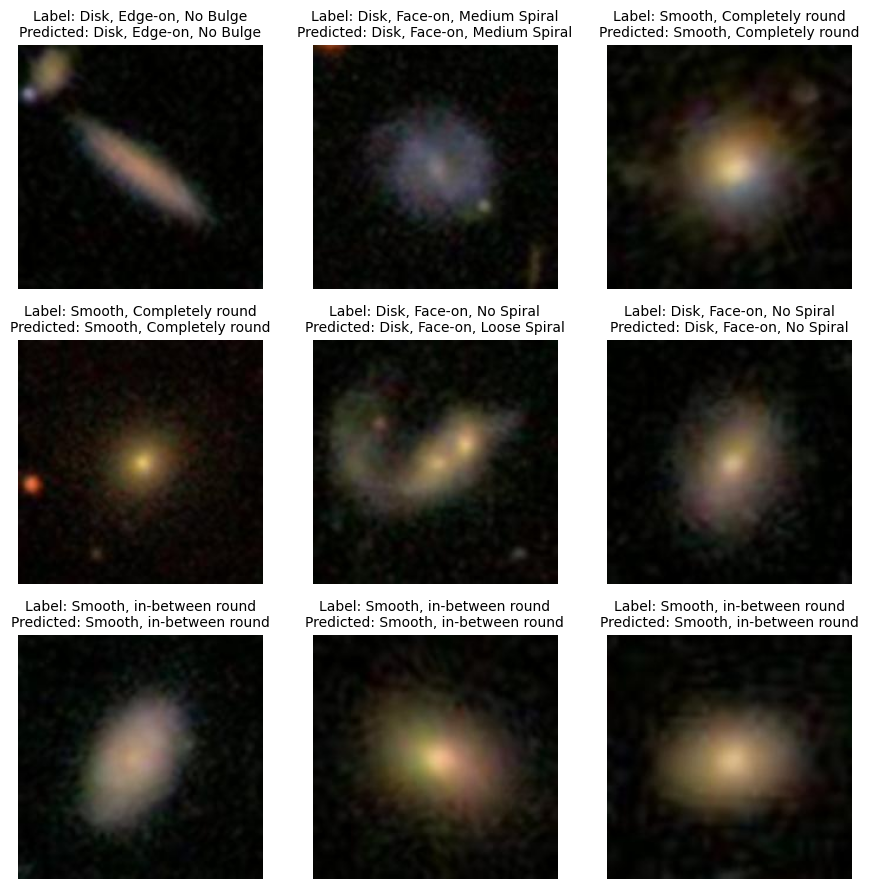

In [68]:
num_samples = 9
test_data = dataset["validation"][:num_samples]
images = test_data["image"]
labels = test_data["label"]
labels = [model.config.id2label[i] for i in labels]

pred_label = []
for i in range(len(images)):
    data = test_data["pixel_values"][i]
    input = data.unsqueeze(0)
    prediction = model(input)
    pred = torch.argmax(prediction.logits).item()
    pred_label.append(model.config.id2label[pred])

plot_images(images, labels, pred_label)